# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [4]:
! pip install matplotlib

In [6]:
import numpy as np
import pandas as pd
import matplotlib as plt


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [8]:
path = '/Users/parkhaneul/Library/Mobile Documents/com~apple~CloudDocs/Club/MDST-Onboarding-main/data/states_edu.csv'

df = pd.read_csv(path)

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [46]:
df_cleaned = df.dropna()

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: * Grade 4 Math *

How many years of data are logged in our dataset? 

In [9]:
years = df['YEAR'].nunique()
print(years)

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [12]:
df_michigan = df[df['STATE'] == 'MICHIGAN']
df_ohio = df[df['STATE'] == 'OHIO']

avg_michigan = df_michigan['AVG_MATH_4_SCORE'].mean()
avg_ohio = df_ohio['AVG_MATH_4_SCORE'].mean()

print("Average across all years of Michigan is", avg_michigan)
print("Average across all years of Ohio is",avg_ohio)


Average across all years of Michigan is 234.36363636363637
Average across all years of Ohio is 239.45454545454547


Find the average for your chosen test across all states in 2019

In [14]:
df_2019 = df[df['YEAR'] == 2019]

avg_2019 = df_2019['AVG_MATH_4_SCORE'].mean()

print(f"The average 4th grade math score across all states in 2019 is {avg_2019}")

The average 4th grade math score across all states in 2019 is 239.9433962264151


For each state, find a maximum value for your chosen test score

In [16]:
maximum = df.groupby('STATE')['AVG_MATH_4_SCORE'].max()

# Print the result
print("Maximum value of 4th grade math scores for each state:")
print(maximum)

Maximum value of 4th grade math scores for each state:
STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPS

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [20]:
df['REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['ENROLL']

df['EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']

Feature engineering justification: **I was wondering how a state's revenue and expernditure per student may affect their math ability**



<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

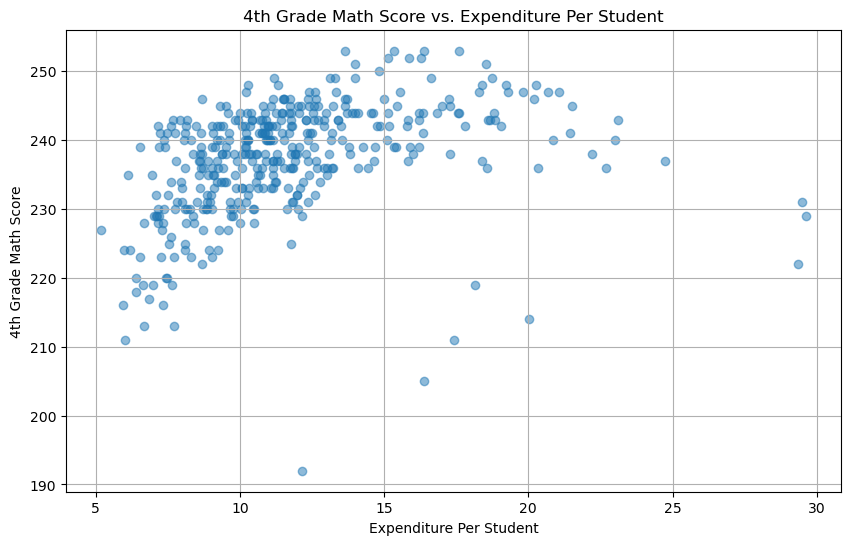

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['EXPENDITURE_PER_STUDENT'], df['AVG_MATH_4_SCORE'], alpha=0.5)
plt.title('4th Grade Math Score vs. Expenditure Per Student')
plt.xlabel('Expenditure Per Student')
plt.ylabel('4th Grade Math Score')
plt.grid(True)
plt.show()

**<CAPTION FOR VIZ 1>** As the expenditure per student increases, the 4th grade math score also increases.

**Visualization 2**

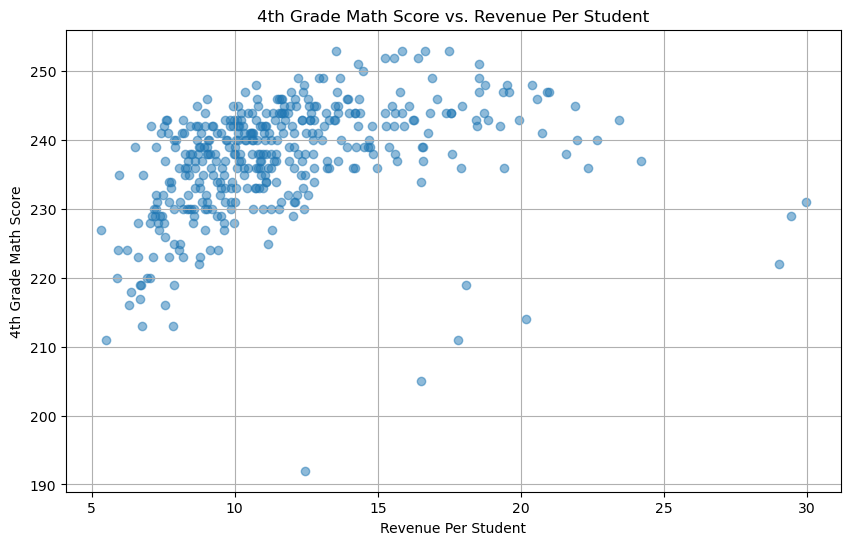

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df['REVENUE_PER_STUDENT'], df['AVG_MATH_4_SCORE'], alpha=0.5)
plt.title('4th Grade Math Score vs. Revenue Per Student')
plt.xlabel('Revenue Per Student')
plt.ylabel('4th Grade Math Score')
plt.grid(True)
plt.show()

**<CAPTION FOR VIZ 2>** Simlar to the viz1, as the revenue per student increases, the 4th grade math score also increases.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [23]:
from sklearn.model_selection import train_test_split

In [47]:
X_cleaned = df_cleaned[['EXPENDITURE_PER_STUDENT', 'REVENUE_PER_STUDENT']]
y_cleaned = df_cleaned['AVG_MATH_4_SCORE']


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [33]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [41]:
# create your model here
model = LinearRegression()

In [49]:
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [51]:
# MSE

np.mean((model.predict(X_test)-y_test)**2)**0.5

5.6962156135263164

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

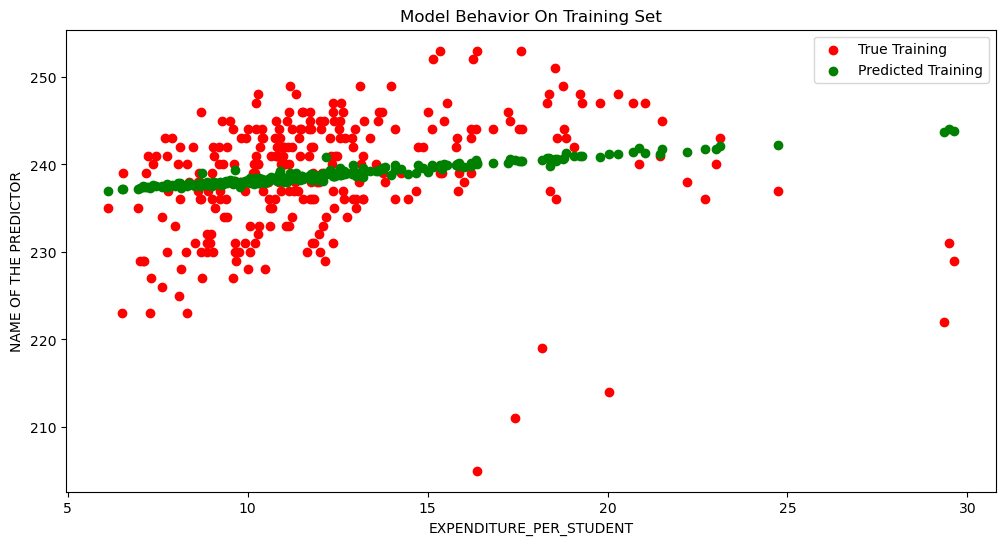

In [52]:
col_name = 'EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

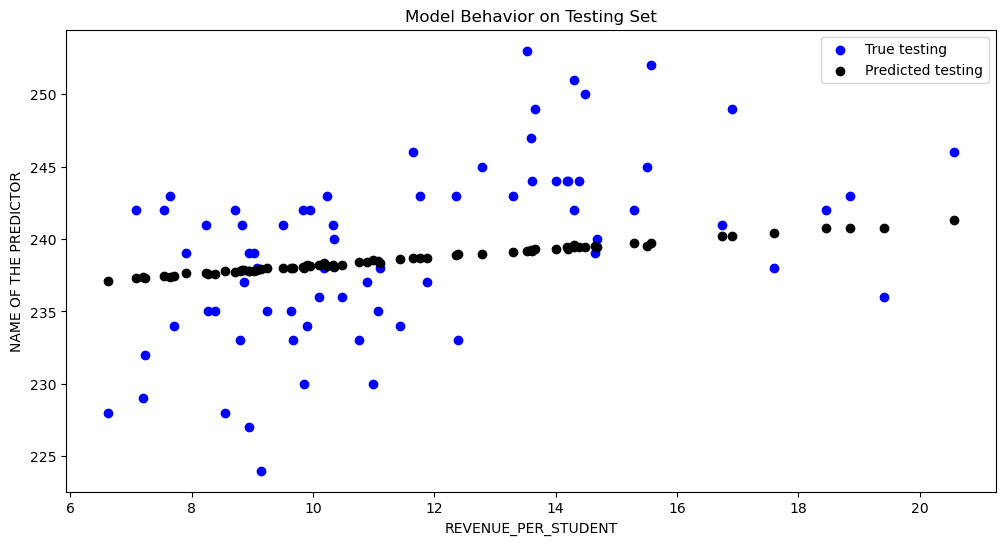

In [54]:
col_name = 'REVENUE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")